[**Demo %s**](#demo-diffmats-2nd)

We test first-order and second-order differentiation matrices for the function $x + \exp(\sin 4x)$ over $[-1,1]$.

In [2]:
f = x -> x + exp(sin(4 * x));

For reference, here are the exact first and second derivatives.

In [3]:
df_dx = x -> 1 + 4 * exp(sin(4x)) * cos(4x);
d2f_dx2 = x -> 4 * exp(sin(4x)) * (4 * cos(4x)^2 - 4 * sin(4x));

We discretize on equally spaced nodes and evaluate $f$ at the nodes.

In [4]:
t, Dₓ, Dₓₓ = FNC.diffmat2(18, [-1, 1])
y = f.(t);

Then the first two derivatives of $f$ each require one matrix-vector multiplication.

In [5]:
yₓ = Dₓ * y
yₓₓ = Dₓₓ * y;

The results show poor accuracy for this small value of $n$.

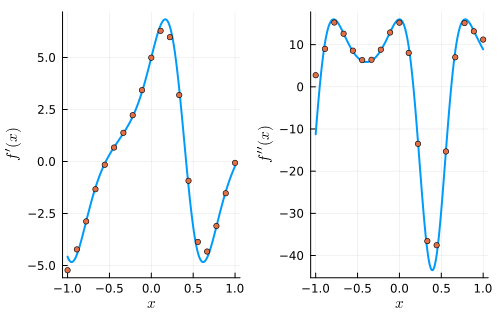

In [6]:
plot(df_dx, -1, 1, layout = 2, xaxis = (L"x"), yaxis = (L"f'(x)"))
scatter!(t, yₓ, subplot = 1)
plot!(d2f_dx2, -1, 1, subplot = 2, xaxis = (L"x"), yaxis = (L"f''(x)"))
scatter!(t, yₓₓ, subplot = 2)

A convergence experiment confirms the order of accuracy. Because we expect an algebraic convergence rate, we use a log-log plot of the errors.

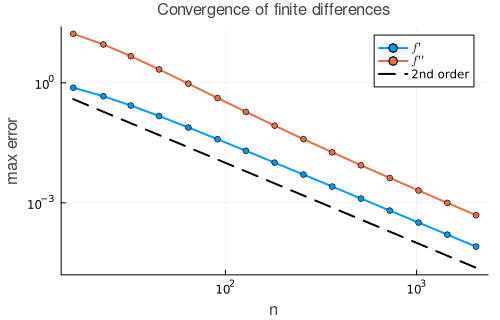

In [7]:
n = @. round(Int, 2^(4:0.5:11))
err = zeros(length(n), 2)
for (k, n) in enumerate(n)
    t, Dₓ, Dₓₓ = FNC.diffmat2(n, [-1, 1])
    y = f.(t)
    err[k, 1] = norm(df_dx.(t) - Dₓ * y, Inf)
    err[k, 2] = norm(d2f_dx2.(t) - Dₓₓ * y, Inf)
end
plot(n, err, m = :o, label = [L"f'" L"f''"])
plot!(n, 10 * 10 * n .^ (-2);
    l = (:dash, :black),
    label = "2nd order",
    xaxis = (:log10, "n"),
    yaxis = (:log10, "max error"),
    title = "Convergence of finite differences")